# Visualize decision boundaries for SDT

In [24]:
from heuristic_evaluation import nodes_in_heuristic_tree, normalize
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print(np.array(nodes_in_heuristic_tree).shape)
X = (nodes_in_heuristic_tree)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape


(28, 9)


(28, 2)

(15, 9)
(31, 9)
(63, 9)


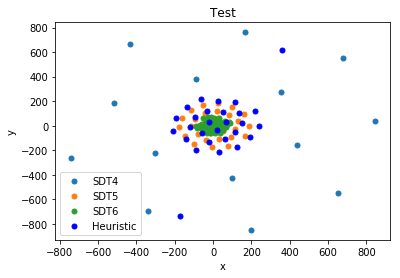

In [25]:
from SDT import SDT
for depth in range(4, 7):
    learner_args = {'input_dim': 8,
                    'output_dim': 4,
                    'depth': depth,
                    'lamda': 1e-3,  # 1e-3
                    'lr': 1e-3,
                    'weight_decay': 0.,  # 5e-4
                    'batch_size': 1280,
                    'epochs': 40,
                    'cuda': False,
                    'log_interval': 100,
                    'exp_scheduler_gamma': 1.,
                    'beta' : False,  # temperature 
                    'l1_regularization': False,  # for feature sparsity on nodes
                    'greatest_path_probability': True  # when forwarding the SDT, \
                    # choose the leaf with greatest path probability or average over distributions of all leaves; \
                    # the former one has better explainability while the latter one achieves higher accuracy
                    }
    learner_args['model_path'] = './model/trees/sdt_'+str(learner_args['depth'])+'_id'+str(1)

    tree = SDT(learner_args)
    tree.load_model(learner_args['model_path'])

    weights = tree.get_tree_weights(Bias=True)
    print(weights.shape)
    weights_embedded = TSNE(n_components=2).fit_transform((weights))
    weights_embedded.shape
    plt.scatter(weights_embedded[:, 0], weights_embedded[:, 1], label='SDT{}'.format(depth), s=25, marker="o")

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], label='Heuristic', color='b', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Test')
plt.legend()
plt.show()

In [9]:
import numpy as np
a=np.array([1,2])
b=np.array([[2,2],[3,3]])
print(b.shape)
print(a@b)

(2, 2)
[8 8]
